# Разведочный анализ и создание моделей

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
# Загружаем данные из полученного нами объединенного датасета, 
# Характеристики процесса - Stress (напряжение, МПа), dL (относительная деформация, %), C_wt (содержание углерода в образце)
df = pd.read_csv(r"C:\Users\piken\anaconda3\DS\Full_Stress_df.csv")

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49622 entries, 0 to 49621
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   L       49622 non-null  float64
 1   F       49622 non-null  float64
 2   F_diff  49619 non-null  float64
 3   C_wt    49622 non-null  float64
 4   dL      49622 non-null  float64
 5   Stress  49622 non-null  float64
dtypes: float64(6)
memory usage: 2.3 MB


In [102]:
# Выведем описательную статистику
df.describe()

,L,F,F_diff,C_wt,dL,Stress
count,49622.000000,49622.000000,49619.000000,49622.000000,49622.000000,49622.000000
mean,0.253175,366.292422,1.473902,77.791706,0.381332,729.508951
std,0.170946,249.534399,0.804789,6.351242,0.249812,547.576213
min,-0.000006,0.071212,-1.302002,62.523000,-0.000009,0.160228
25%,0.116475,162.649101,1.084473,76.555000,0.178455,302.526312
50%,0.234423,339.580521,1.218750,80.195000,0.359614,631.638535
75%,0.357211,518.441269,1.671875,81.405000,0.539306,1009.816534
max,0.842485,1182.544800,6.875000,85.743000,1.203548,2645.988464


In [103]:
# Удалим столбцы с промежуточными вычислениями. 
# Затем вызовем функцию drop(), передавая параметр оси=1 - ищем значение в столбцах объекта. 
# Посмотрим размерность
to_drop = ['L', 'F', 'F_diff']
df.drop(to_drop, inplace=True, axis=1)
# Выведем количество строк и колонок
df.shape

(49622, 3)

In [104]:
# Ещё раз выведем описательную статистику
df.describe()

,C_wt,dL,Stress
count,49622.000000,49622.000000,49622.000000
mean,77.791706,0.381332,729.508951
std,6.351242,0.249812,547.576213
min,62.523000,-0.000009,0.160228
25%,76.555000,0.178455,302.526312
50%,80.195000,0.359614,631.638535
75%,81.405000,0.539306,1009.816534
max,85.743000,1.203548,2645.988464


In [105]:
# Проверим, есть ли пропущенные значения в датасете
print('Кол-во пропусков в датасете: {}'.format(df.isna().sum().sum()))

Кол-во пропусков в датасете: 0


## Разведочный анализ данных

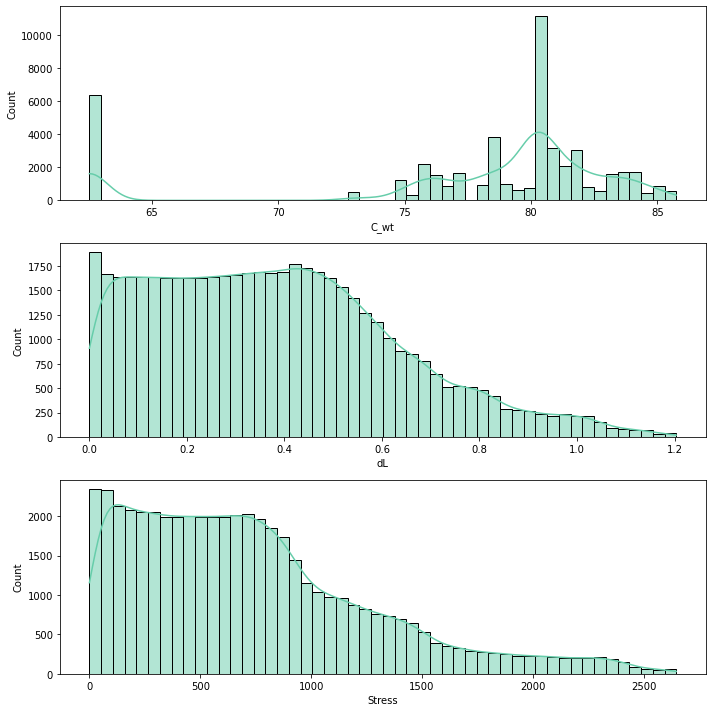

In [8]:
# # Создадим функцию для построения гистограммы признаков

def EDA_hist (df, n_rows, n_cols):
    fig=plt.figure(figsize=(10, 10))
    for i, column in enumerate(df.columns):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.histplot(data=df, x=column, kde=True, bins=50, color = 'mediumaquamarine')
#        ax.set_ylabel('по оси Y ...')
    fig.tight_layout()
   
    plt.show()

EDA_hist(df,3,1)

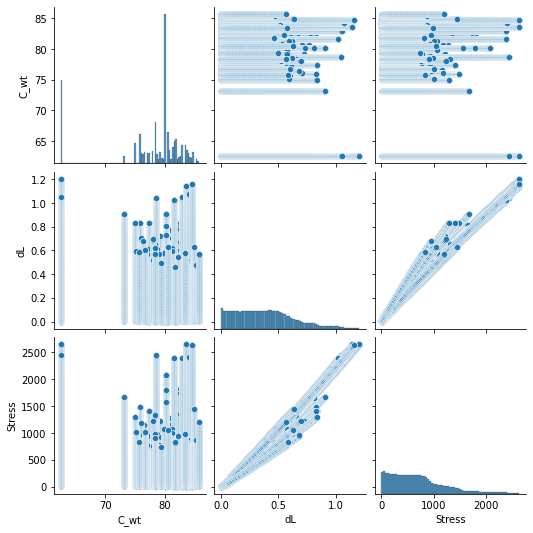

In [9]:
# посмотрим на парные диаграммы распределения всех признаков
sns.pairplot(df);

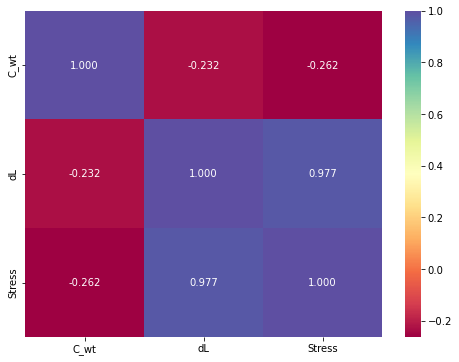

In [10]:
# Рассмотрим матрицу корреляции и тепловую карту
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.3f', cmap='Spectral', ax=ax);

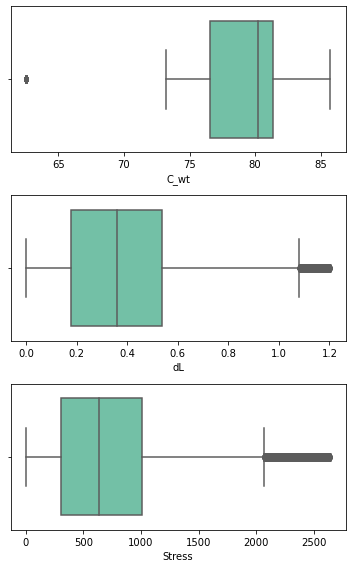

In [11]:
# Построим Boxplot для всех параметров датафрейма df
# Создадим функцию 
def Box_plot (df, n_rows, n_cols):
    fig=plt.figure(figsize=(5, 8))
    for i, column in enumerate(df.columns):

        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.boxplot(data=df, x=column, color = 'mediumaquamarine')
    fig.tight_layout()
    plt.show()

Box_plot(df,3,1)

In [12]:
# Удалим выбросы, используя метод межквартильных расстояний
for i in df.columns:
    q75, q25 = np.percentile(df.loc[:,i], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan
df.dropna(inplace = True)

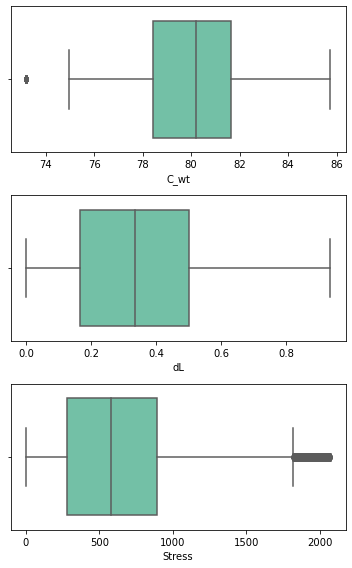

In [13]:
Box_plot(df,3,1)

In [14]:
df.shape

(42485, 3)

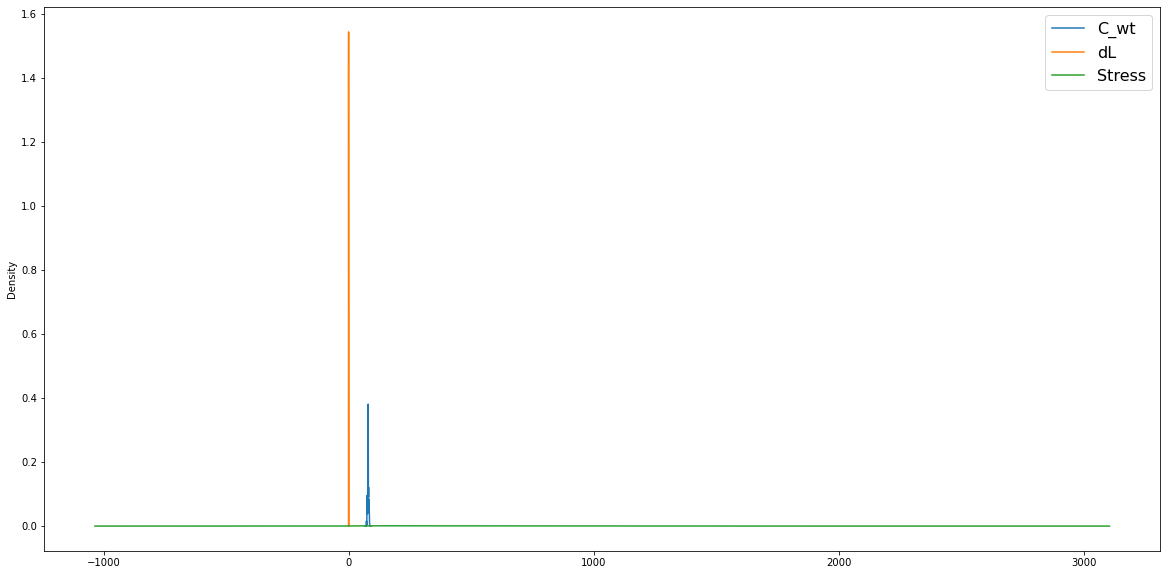

In [15]:
# Оценим плотность ядра
def plt_kde(df):
    fig, ax = plt.subplots(figsize=(20, 10))
    df.plot(kind='kde', ax=ax)
    plt.legend(fontsize=16)
plt_kde(df)

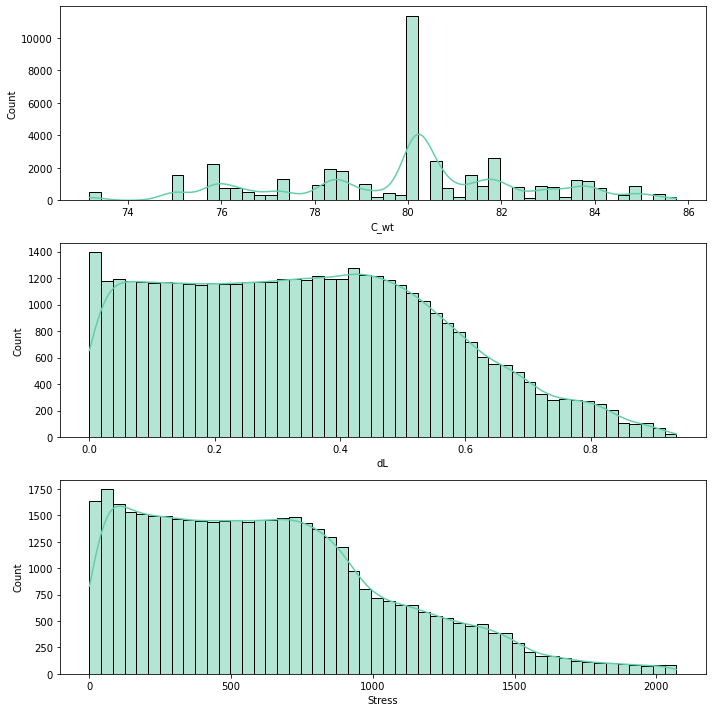

In [16]:
# Создадим функцию для построения диаграмм
def EDA_hist (df, n_rows, n_cols):
    fig=plt.figure(figsize=(10, 10))
    for i, column in enumerate(df.columns):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.histplot(data=df, x=column, kde=True, bins=50, color = 'mediumaquamarine')
    fig.tight_layout()
    plt.show()

EDA_hist(df,3,1)

## Нормализация данных

In [18]:
# Нормализуем данные c помощью MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
# Обучим нормализатор, создадим новую переменную dfnorm, создадим массив nparray
dfnorm_MMS = minmaxscaler.fit_transform(np.array(df[['C_wt', 'dL', 'Stress']]))

In [19]:
dfnorm_MMS[:1]

array([[3.31449944e-01, 1.55720412e-05, 3.36197307e-03]])

In [20]:
# Вернем названия столбцов, преобразуем в датафрейм обратно
dfnorm_MMS = pd.DataFrame(data = dfnorm_MMS, columns = ['C_wt', 'dL', 'Stress'])
dfnorm_MMS.head()

,C_wt,dL,Stress
0,0.33145,0.000016,0.003362
1,0.33145,0.000022,0.003368
2,0.33145,0.000129,0.003559
3,0.33145,0.000641,0.003858
4,0.33145,0.001611,0.004315


In [21]:
# Посмотрим, как изменилось среднее значение. Выведем описательную статистику:
# Посмотрим графики распределения
dfnorm_MMS.describe()

,C_wt,dL,Stress
count,42485.000000,42485.000000,42485.000000
mean,0.542709,0.369410,0.306768
std,0.207070,0.228884,0.211522
min,0.000000,0.000000,0.000000
25%,0.418988,0.177428,0.134573
50%,0.558491,0.359325,0.280695
75%,0.672927,0.535060,0.431793
max,1.000000,1.000000,1.000000


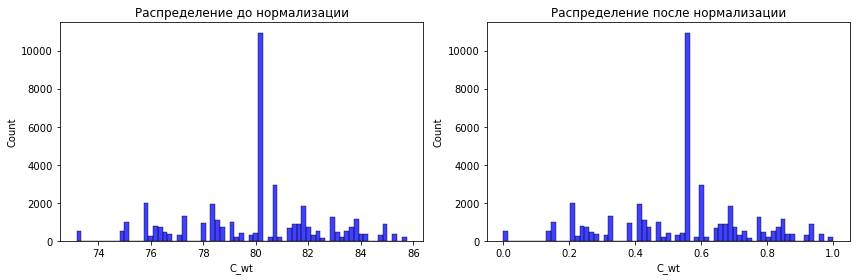

In [22]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.histplot(df['C_wt'], color = 'blue').set_title('Распределение до нормализации')
plt.subplot(122)
sns.histplot(dfnorm_MMS['C_wt'], color = 'blue').set_title('Распределение после нормализации')
plt.tight_layout()
plt.rc('axes', labelsize=10) #fontsize of the x and y labels


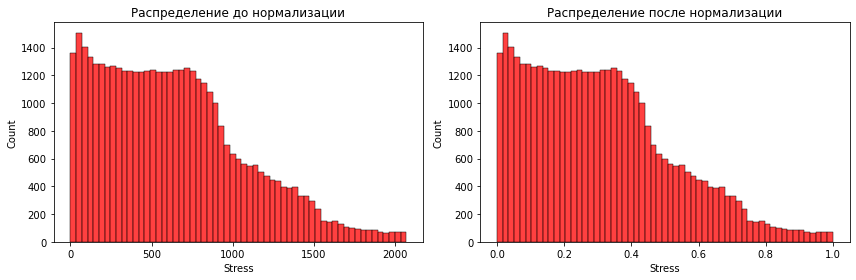

In [23]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.histplot(df['Stress'], color = 'red').set_title('Распределение до нормализации')
plt.subplot(122)
sns.histplot(dfnorm_MMS['Stress'], color = 'red').set_title('Распределение после нормализации')
plt.tight_layout()

Результат нормализации с помощью MinMaxScaler не устраивает
Попробуем применить метод PowerTransformer из библиотеки sklearn:

In [24]:
from sklearn.preprocessing import PowerTransformer
yeo = PowerTransformer(method='yeo-johnson', standardize=True)
dfnorm_PT = pd.DataFrame(yeo.fit_transform(df), columns=df.columns)
dfnorm_PT.head()

,C_wt,dL,Stress
0,-1.026045,-1.814900,-2.247307
1,-1.026045,-1.814860,-2.247055
2,-1.026045,-1.814207,-2.239318
3,-1.026045,-1.811071,-2.227549
4,-1.026045,-1.805147,-2.210352


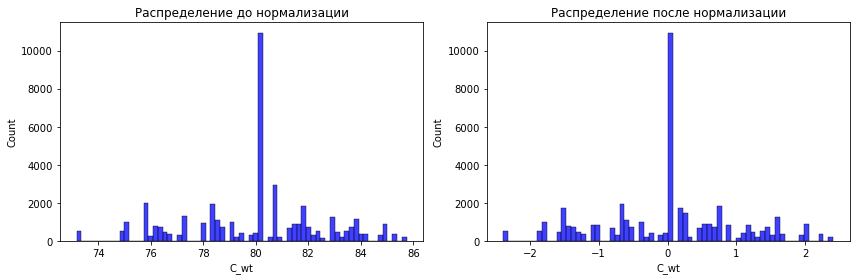

In [25]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.histplot(df['C_wt'], color = 'blue').set_title('Распределение до нормализации')
plt.subplot(122)
sns.histplot(dfnorm_PT['C_wt'], color = 'blue').set_title('Распределение после нормализации')
plt.tight_layout()

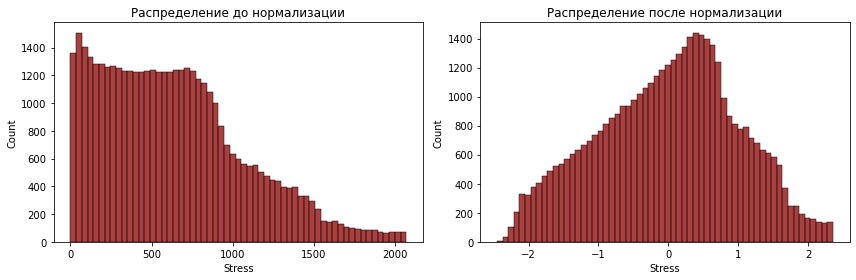

In [26]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.histplot(df['Stress'], color = 'darkred').set_title('Распределение до нормализации')
plt.subplot(122)
sns.histplot(dfnorm_PT['Stress'], color = 'darkred').set_title('Распределение после нормализации')
plt.tight_layout()

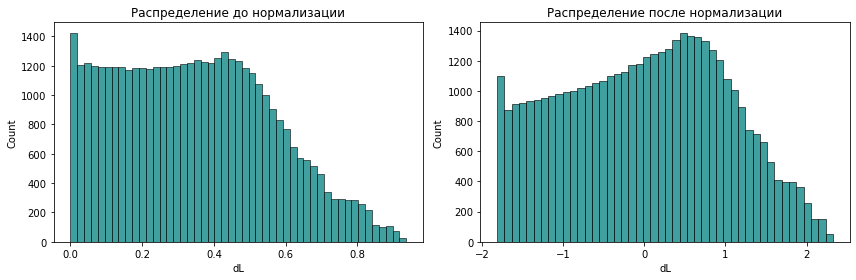

In [27]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.histplot(df['dL'], color = 'teal').set_title('Распределение до нормализации')
plt.subplot(122)
sns.histplot(dfnorm_PT['dL'], color = 'teal').set_title('Распределение после нормализации')
plt.tight_layout()

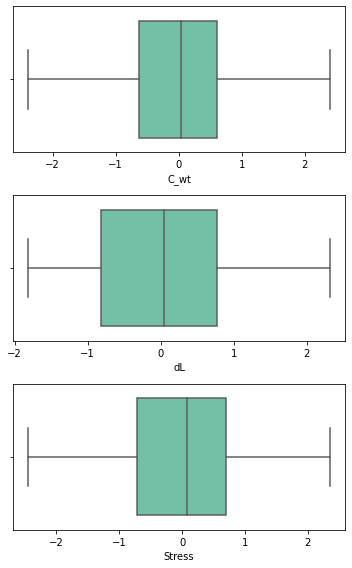

In [28]:
Box_plot(dfnorm_PT,3,1)

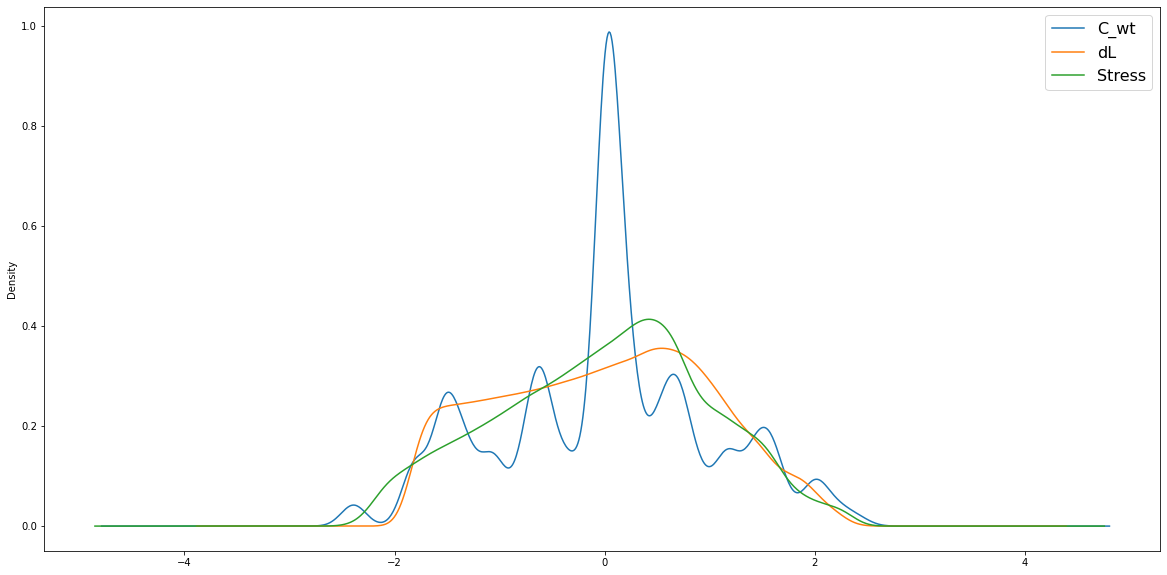

In [31]:
# Плотность ядра после нормализации
plt_kde(dfnorm_PT)

Text(0.5, 1.0, 'Распределение до нормализации')

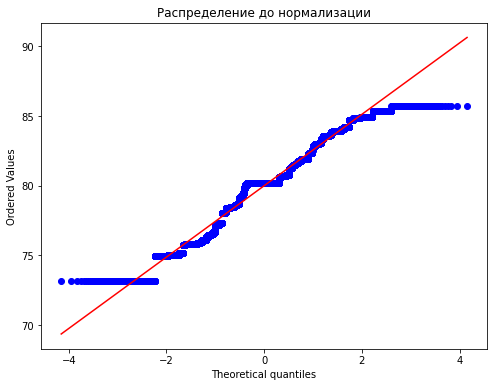

In [32]:
# Построим Probability-график (график вероятности)
from scipy import stats

plt.figure(figsize=(8,6))
stats.probplot(df['C_wt'], dist='norm', plot=plt)
plt.title('Распределение до нормализации')


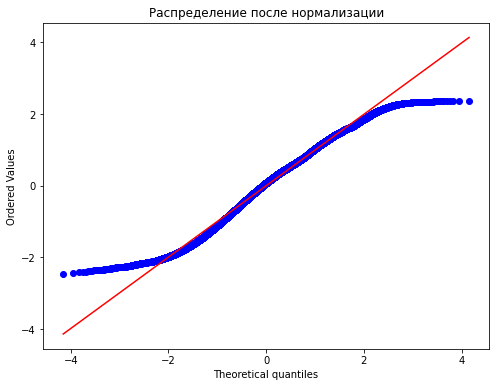

In [33]:
plt.figure(figsize=(8,6))
stats.probplot(dfnorm_PT['Stress'], dist='norm', plot=plt)
plt.title('Распределение после нормализации');

<AxesSubplot:ylabel='Frequency'>

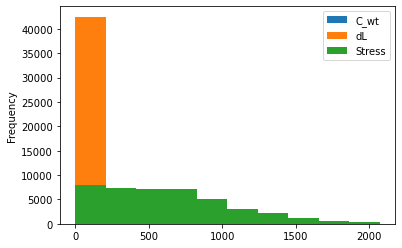

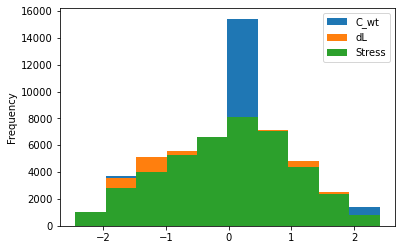

In [34]:
# Визуализируем переменные в виде столбчатой гистограммы до и после нормализации
df.plot.hist()
dfnorm_PT.plot.hist()

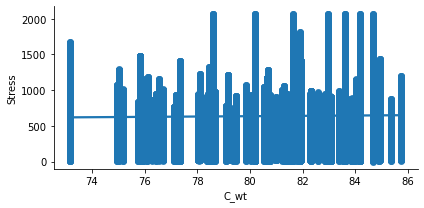

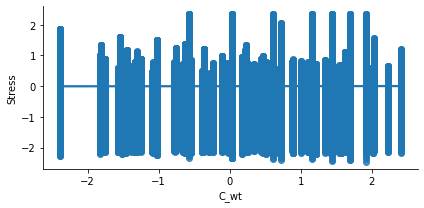

In [35]:
# Отобразим диаграмму рассеяния, показывающую взаимосвязь между признаками Stress и C_wt
sns.lmplot(data = df, x = 'C_wt', y = 'Stress', aspect = 2, height = 3)
plt.show()
sns.lmplot(data = dfnorm_PT, x = 'C_wt', y = 'Stress', aspect = 2, height = 3)
plt.show()

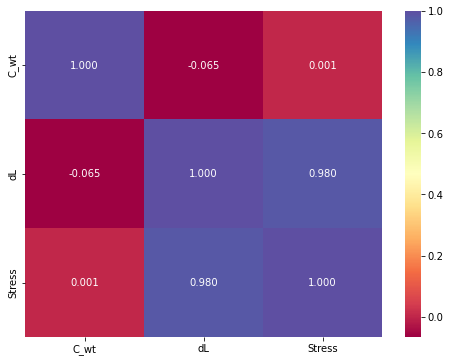

In [36]:
# Рассмотрим матрицу корреляции и тепловую карту после нормализации
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(dfnorm_PT.corr(), annot=True, fmt='.3f', cmap='Spectral', ax=ax);

#### Максимальную корреляцию наблюдаем между параметрами C_wt-dL и C_wt-Stress

In [37]:
dfnorm_PT.head()

,C_wt,dL,Stress
0,-1.026045,-1.814900,-2.247307
1,-1.026045,-1.814860,-2.247055
2,-1.026045,-1.814207,-2.239318
3,-1.026045,-1.811071,-2.227549
4,-1.026045,-1.805147,-2.210352


In [104]:
# Сохраним полученный датафрейм:
# df.to_csv(data_path + 'df_zscored.csv')
dfnorm_PT.to_csv('dfnorm.csv', index=False)

In [105]:
dfnorm_PT.shape

(42485, 3)

## Создание моделей для прогнозирования

In [ ]:
# Модели для прогноза усилия (Stress) от содержания углерода (C_wt)

### Подготовка к моделированию

In [106]:
df = pd.read_csv(r"dfnorm.csv")

In [107]:
df.head()

,C_wt,dL,Stress
0,-1.026045,-1.814900,-2.247307
1,-1.026045,-1.814860,-2.247055
2,-1.026045,-1.814207,-2.239318
3,-1.026045,-1.811071,-2.227549
4,-1.026045,-1.805147,-2.210352


In [108]:
# Создадим функции для визуализация 
# предсказанных значений целевых переменных в сравнении с тестовыми
def predicted_plot(y_test, y_pred, model_name):
  plt.figure(figsize=(15,6))
  plt.title(f'Тестовые и прогнозные значения, Модуль 1: {model_name}')
  plt.plot(y_test.to_numpy()[:], color='steelblue', label='Тест')
  plt.plot(y_pred[:],  color='springgreen', label='Прогноз')
  plt.legend(loc='best')

# Для одной целевой переменной
def predicted_perc(y_test, y_pred):
    plt.figure(figsize=(12,6))
    plt.title(f'Тестовые и прогнозные значения, Соотношение C_wt/Stress')
    plt.plot(y_test.to_numpy(), color='navy', label='Тест')
    plt.plot(y_pred, color='fuchsia', label='Прогноз')
    plt.legend(loc='best')

In [109]:
from sklearn.preprocessing import PowerTransformer

In [110]:
# Сохраним масштабаторы для x и y
from joblib import dump, load
powertransformer_y = PowerTransformer()  
powertransformer_x = PowerTransformer()
y_label = ['C_wt', 'dL']
powertransformer_y.fit(dfc[y_label])
powertransformer_x.fit(dfc.drop(y_label, axis = 1))

# Сохраним масштабаторы для x и y
# from joblib import dump, load
dump(powertransformer_y, 'powertransformer_y.joblin')
dump(powertransformer_x, 'powertransformer_x.joblin')

['powertransformer_x.joblin']

In [ ]:
# Сохраним масштабаторы в формате pkl
dump(powertransformer_x, 'powertransformer_x.pkl')
dump(powertransformer_y, 'powertransformer_y.pkl')

In [111]:
# проверим x
powertransformer_y_l = load('powertransformer_y.joblin')
x1 = powertransformer_y_l.inverse_transform(np.array([0.1,0.99]).reshape(1,-1))
x1[0][0], x1[0][1]

(0.34614783580809294, 0.7796493836909073)

In [ ]:
# проверим y
powertransformer_x_l = load('powertransformer_x.joblin')
y1 = powertransformer_x_l.inverse_transform(np.array([0.5]).reshape(1,-1))
y1[0][0]

In [112]:
y_label = ['C_wt', 'Stress']
y = df[y_label] 
x = df.drop(y_label, axis = 1)
y.shape,x.shape

((42485, 2), (42485, 1))

## Создадим тренировочную и тестовую выборки

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn import metrics

In [115]:
# Скопируем датафрейм в X. y будет равен колонке Stress
x = df.copy()
y = x.pop('Stress')
y_label = ['C_wt', 'Stress']
y.shape, x.shape

((42485,), (42485, 2))

In [116]:
# Создадим список в котором будем хранить названия моделей
# Разделим датасет на тренировочную и тестовую выборку
# Активируем перемешивание образцов (shuffle=True), train - 70%, test - 30%
model_list = []
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.3, 
                                                    random_state=17, 
                                                    shuffle=True
                                                   )

In [117]:
# Посмотрим на результат работы функции train_test_split
print (x_train.shape, x_test.shape)

(29739, 2) (12746, 2)


In [118]:
# Итоговый датасет ошибок
loss_df = pd.DataFrame(columns=['target','model','MAE','RSME', 'R2'])

In [119]:
def add_loss(loss_df, model_name, y_test, y_pred):
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    RSME = metrics.mean_squared_error(y_test,y_pred)
    R2 = metrics.r2_score(y_test, y_pred)
    df = pd.DataFrame({'model':model_name,\
                       'target':['Stress'],\
                       'MAE': MAE,\
                       'RSME': RSME,\
                       'R2':R2})
    loss_df = pd.concat([loss_df, df],ignore_index=True)
    return loss_df

In [120]:
# время выполнения кода
import time 

## Модель ЛИНЕЙНОЙ РЕГРЕССИИ

In [121]:
# Импортируем модель линейной регрессии
from sklearn.linear_model import LinearRegression
# импортируем модуль метрик
from sklearn import metrics

In [122]:
# ЛИНЕЙНАЯ РЕГРЕССИЯ
del loss_df
loss_df = pd.DataFrame([])
model = LinearRegression()
model.fit(x_train,  y_train)
y_pred = model.predict(x_test)

model_name = 'Linear Regression'
model_list.append(model)
loss_df = add_loss(loss_df, model_name, y_test, y_pred)
model

LinearRegression()

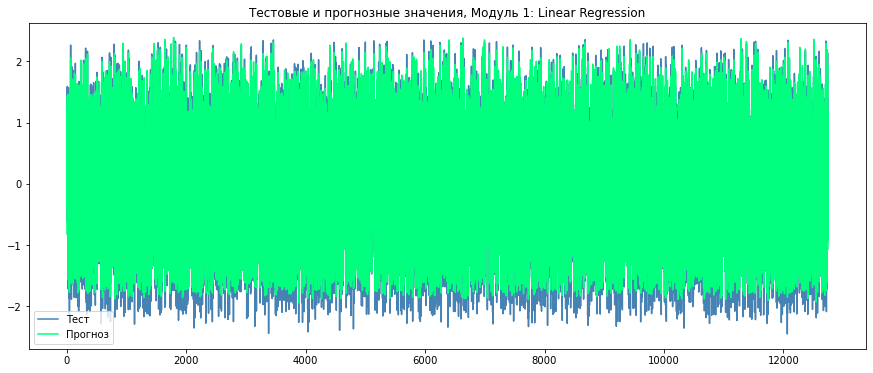

In [123]:
predicted_plot(y_test, y_pred, model_name)

In [124]:
loss_df

,model,target,MAE,RSME,R2
0,Linear Regression,Stress,0.155514,0.03608,0.963962


## Модель ELASTIC NET

In [125]:
# ELASTIC NET - Линейная регрессия с регуляризацией
from sklearn.linear_model import ElasticNet 

model = ElasticNet()
model.fit(x_train,  y_train)
y_pred = model.predict(x_test)


model = ElasticNet(random_state = 42)
grid = {
    'alpha': np.linspace(0.01, 1, 50)
                         }

gsc = GridSearchCV(model, grid, n_jobs=-1, cv=10,verbose = 1)
gsc.fit(x_train, y_train)
model = gsc.best_estimator_
model.fit(x_train,  y_train)
y_pred = model.predict(x_test)
model_name = 'ElasticNet'
model_list.append(model)
loss_df = add_loss(loss_df,model_name, y_test, y_pred)
model


Fitting 10 folds for each of 50 candidates, totalling 500 fits


ElasticNet(alpha=0.01, random_state=42)

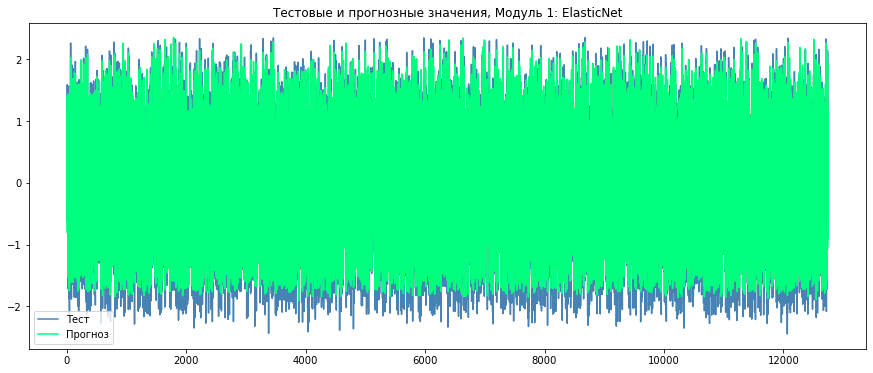

In [126]:
predicted_plot(y_test, y_pred,model_name)

In [127]:
loss_df.head()

,model,target,MAE,RSME,R2
0,Linear Regression,Stress,0.155514,0.036080,0.963962
1,ElasticNet,Stress,0.155909,0.036211,0.963831


## Модель ЛАССО

In [128]:
# LASSO (Least absolute shrinkage and selection operator) - метод оценивания коэффициентов линейной регрессионной модели
from sklearn.linear_model import Lasso

model = Lasso(random_state = 42)
grid = {
    'alpha': np.linspace(0.01, 1, 50)
                         }

gsc = GridSearchCV(model, grid, n_jobs=-1, cv=10,verbose = 1)
gsc.fit(x_train, y_train)
model = gsc.best_estimator_
model.fit(x_train,  y_train)
y_pred = model.predict(x_test)
model_name = 'Lasso'
model_list.append(model)
loss_df = add_loss(loss_df,model_name,y_test, y_pred)
model

Fitting 10 folds for each of 50 candidates, totalling 500 fits


Lasso(alpha=0.01, random_state=42)

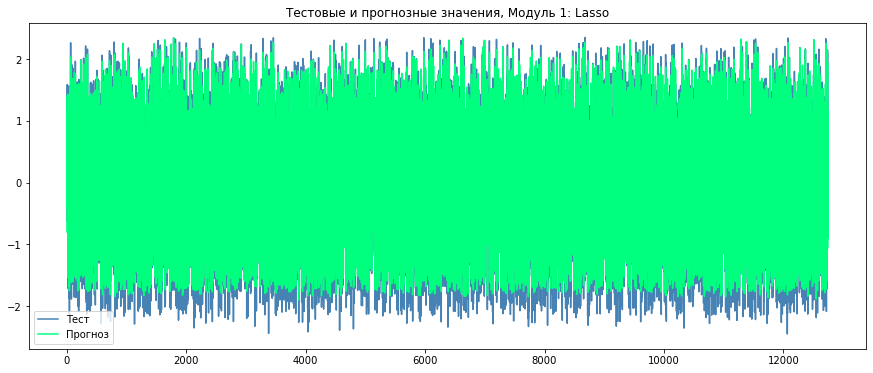

In [129]:
predicted_plot(y_test, y_pred,model_name)

In [130]:
loss_df.head()

,model,target,MAE,RSME,R2
0,Linear Regression,Stress,0.155514,0.036080,0.963962
1,ElasticNet,Stress,0.155909,0.036211,0.963831
2,Lasso,Stress,0.156013,0.036300,0.963743


## Алгоритм регрессии K БЛИЖАЙШИХ СОСЕДЕЙ

In [131]:
# К Ближайших соседей - KNeighborsRegressor
model = KNeighborsRegressor()
grid = {'n_neighbors' : range(1, 50, 1), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto']
          }

gsc = GridSearchCV(model, grid, n_jobs=-1, cv=5,verbose = 1)

In [132]:
# Время выполнения
start = time.time() ## точка отсчета времени

gsc.fit(x_train,  y_train)
model = gsc.best_estimator_
model.fit(x_train,  y_train)
y_pred = model.predict(x_test)
model_name = 'KNeighborsRegressor'
model_list.append(model)
loss_df = add_loss(loss_df,model_name,y_test, y_pred)

# Вывод времени выполнения кода программы
end = time.time() - start
print(end)

Fitting 5 folds for each of 98 candidates, totalling 490 fits
35.90286421775818


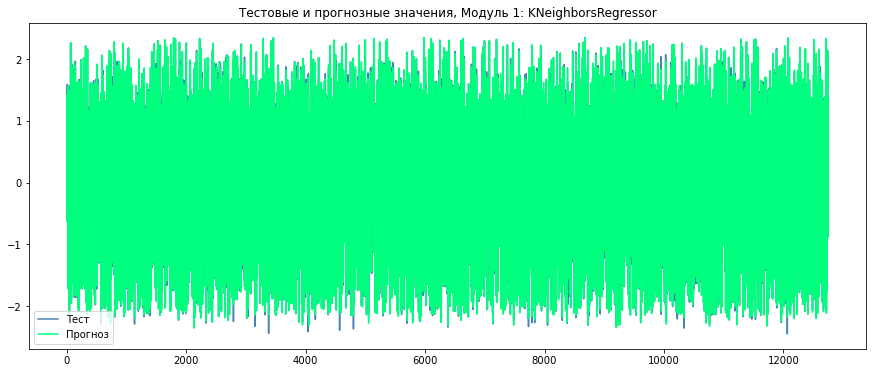

In [133]:
predicted_plot(y_test, y_pred,model_name)

In [134]:
loss_df.head()

,model,target,MAE,RSME,R2
0,Linear Regression,Stress,0.155514,0.036080,0.963962
1,ElasticNet,Stress,0.155909,0.036211,0.963831
2,Lasso,Stress,0.156013,0.036300,0.963743
3,KNeighborsRegressor,Stress,0.042737,0.005516,0.994491


In [69]:
import sys
print(sys.version)
print(tf.__version__)
print(np.__version__)

3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
2.11.0
1.20.3


## Метод СЛУЧАЙНОГО ЛЕСА

In [83]:
# Random Forest Regression - Метод СЛУЧАЙНОГО ЛЕСА
from sklearn.ensemble import RandomForestRegressor

# Время выполнения
start = time.time() ## точка отсчета времени

model = RandomForestRegressor(n_estimators = 100, random_state = 0)
grid = {
    'n_estimators' : range(0, 101, 25),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(1, 5, 1),
}
gsc = GridSearchCV(model, grid, n_jobs=-1, cv=5,verbose = 1)
gsc.fit(x_train,  y_train)
model = gsc.best_estimator_
y_pred = model.predict(x_test)
model.fit(x_train,  y_train)

model_name = 'Random Forest Regressor'

model_list.append(model)
loss_df = add_loss(loss_df,model_name,y_test, y_pred)

# Вывод времени выполнения кода программы
end = time.time() - start
print(end)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\piken\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.67519195 0.67398978 0.67423427 0.67410488        nan
 0.5193432  0.49241795 0.50156768 0.51247674        nan 0.5193432
 0.49241795 0.50156768 0.51247674        nan 0.89256468 0.89193844
 0.89195766 0.8920725         nan 0.7510286  0.723808   0.73542322
 0.74407877        nan 0.7510286  0.723808   0.73542322 0.74407877
        nan 0.95042368 0.95012411 0.95006655 0.95009002        nan
 0.84924417 0.85585774 0.86552036 0.87039303        nan 0.84924417
 0.85585774 0.86552036 0.87039303        nan 0.96662917 0.96654404
 0.96647004 0.96654727        nan 0.9294058  0.92869564 0.93005825
 0.93131322        nan 0.9294058  0.92869564 0.93005825 0.93131322]
  warnings.warn(


50.45565056800842


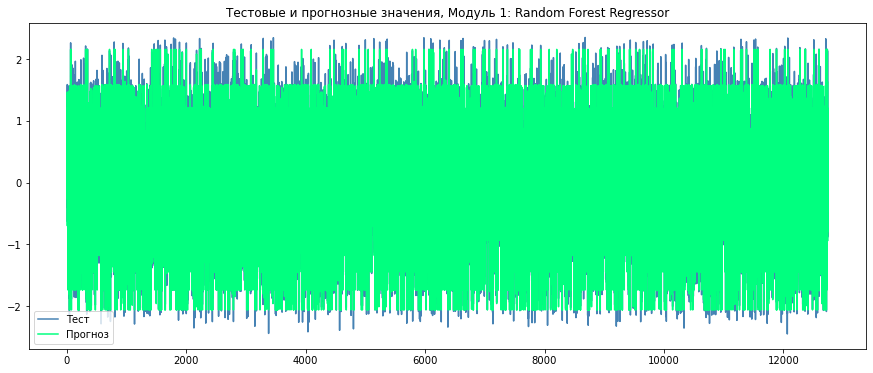

In [84]:
predicted_plot(y_test, y_pred, model_name)

In [85]:
loss_df

,model,target,MAE,RSME,R2
0,Linear Regression,Stress,0.155514,0.036080,0.963962
1,ElasticNet,Stress,0.155909,0.036211,0.963831
2,Lasso,Stress,0.156013,0.036300,0.963743
3,KNeighborsRegressor,Stress,0.042737,0.005516,0.994491
4,Random Forest Regressor,Stress,0.145526,0.033752,0.966288


## МНОГОСЛОЙНЫЙ ПЕРСЕПТРОН

In [86]:
from keras.layers import Dense # импортируем класс
from keras.layers import Input # импортируем класс
from keras.models import Model # импортируем класс модель

from keras.engine.sequential import Sequential
#from keras import layers
#from keras import models

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

In [87]:
ds = pd.read_csv(r"dfnorm.csv")

In [88]:
y = ds['Stress']
X = ds.drop(['Stress'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)
y.shape, X.shape

((42485,), (42485, 2))

In [89]:
from keras import layers
from keras import models
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 1])
    plt.xlabel('Эпоха')

    plt.ylabel('MAE [MPG]')
    plt.legend()
    plt.grid(True)
model = Sequential()
model.add(layers.Dense(50, input_dim=X.shape[1], activation='relu', name="layer1"))
model.add(layers.Dropout(0.12))
model.add(layers.Dense(128, activation='relu', name="layer2"))
model.add(layers.Dropout(0.12))
model.add(layers.Dense(19, activation='tanh', name="layer3"))
model.add(layers.Dense(1))

In [90]:
# Время выполнения
start = time.time() ## точка отсчета времени

model.summary()
dfmodel = model.compile(optimizer='adam', loss='mae', metrics=['mae'])
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=1, epochs=60)

# Вывод времени выполнения кода программы
end = time.time() - start
print(end)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 50)                150       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 layer2 (Dense)              (None, 128)               6528      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 layer3 (Dense)              (None, 19)                2451      
                                                                 
 dense (Dense)               (None, 1)                 20        
                                                                 
Total params: 9,149
Trainable params: 9,149
Non-trainabl

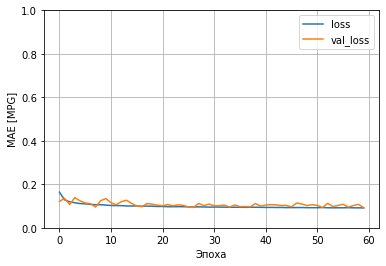

In [91]:
plot_loss(history)

In [92]:
y_pred = model.predict(X_test)
model.fit(X_train,  y_train)

model_name = 'Нейросеть TF02'
model_list.append(model)
loss_df = add_loss(loss_df,model_name,y_test, y_pred)
model

930/930 [==============================] - 2s 2ms/step - loss: 0.0914 - mae: 0.0914


399/399 [==============================] - 1s 1ms/step


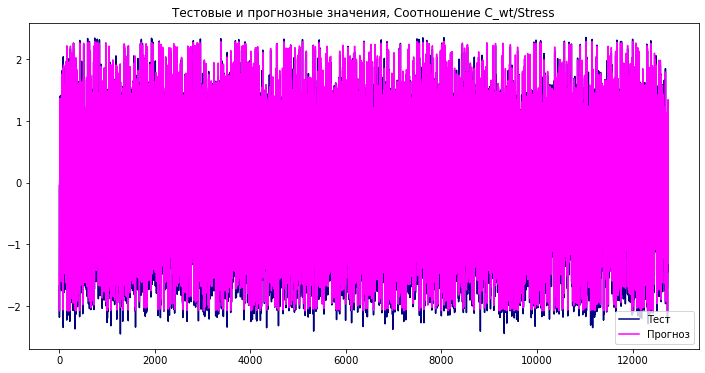

In [93]:
predicted_perc(y_test, model.predict(X_test))

In [94]:
loss_df

,model,target,MAE,RSME,R2
0,Linear Regression,Stress,0.155514,0.036080,0.963962
1,ElasticNet,Stress,0.155909,0.036211,0.963831
2,Lasso,Stress,0.156013,0.036300,0.963743
3,KNeighborsRegressor,Stress,0.042737,0.005516,0.994491
4,Random Forest Regressor,Stress,0.145526,0.033752,0.966288
5,Нейросеть TF02,Stress,0.092696,0.017186,0.982698


## СОХРАНЕНИЕ МОДЕЛИ

In [95]:
model_path = "VKR_model"

In [96]:
model.save(model_path)

INFO:tensorflow:Assets written to: VKR_model\assets


INFO:tensorflow:Assets written to: VKR_model\assets
